In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import GPy
X = 1.0*np.array([[8,0],[3.5,2.5],[6,4],[8,7]])
Y = 1.0*np.array([[32,3,10,7.5]]).T
Y+=np.random.randn(len(Y),1)*1.0

In [2]:
ymean = -np.mean(Y/np.diff(X))
kernel = GPy.kern.Multidimensional_Integral_Limits(input_dim=2, variances=1.0, lengthscale=[8.0])
m = GPy.models.GPRegression(X,Y+np.diff(X)*ymean,kernel)
m.optimize_restarts()

Optimization restart 1/10, f = 7.868988078855665
Optimization restart 2/10, f = 7.868988117027744
Optimization restart 3/10, f = 7.868988211881031
Optimization restart 4/10, f = 7.868988510275482
Optimization restart 5/10, f = 7.868988359368008
Optimization restart 6/10, f = 7.868988384066984
Optimization restart 7/10, f = 7.868995689960624
Optimization restart 8/10, f = 7.8689889117605585
Optimization restart 9/10, f = 7.868988387756742
Optimization restart 10/10, f = 7.868988462811292


In [3]:
m

GP_regression.,value,constraints,priors
integral.variances,9.429603432438467,+ve,
integral.lengthscale,6.302535571970981,+ve,
Gaussian_noise.variance,1.5084928124501037e-09,+ve,


In [4]:
testtimes = np.arange(-5,15,0.1)
(speed, var) = m.predict(np.c_[testtimes[:,None],np.full([len(testtimes),1],0)])
speed=speed+ymean

0.7745966692414834
0.8801117367933934
0.9381427059852853
0.9685776716326292


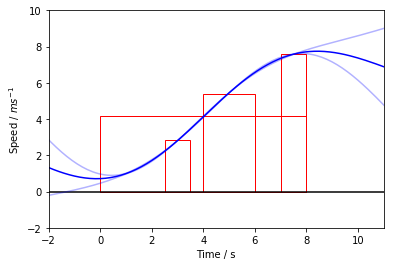

In [5]:
import matplotlib.patches as patches
scale = 0.6
for x,y in zip(X,Y):
    scale = scale ** 0.5
    ax = plt.gca()
    print(scale)
    #xs = np.array([x[1],x[0],x[0],x[1]])
    #ys = np.array([0,0,2*y/(x[0]-x[1]),0])
    #xs = (xs - np.mean(xs))*scale + np.mean(xs)
    #ys = (ys - np.mean(ys))*scale + np.mean(ys)
    #plt.plot(xs,ys,'k-')
    rect = patches.Rectangle((x[1],0),x[0]-x[1],y/(x[0]-x[1]),linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.xlim([-2,11])
plt.ylim([-2,10])
plt.xlabel('Time / s')
plt.ylabel('Speed / $ms^{-1}$')
plt.plot(testtimes,speed,'b-')
plt.plot(testtimes,speed+1.96*np.sqrt(var),'b-',alpha=0.3)
plt.plot(testtimes,speed-1.96*np.sqrt(var),'b-',alpha=0.3)
plt.hlines(0,-10,20)
plt.savefig('robot.pdf')

In [6]:
m

GP_regression.,value,constraints,priors
integral.variances,9.429603432438467,+ve,
integral.lengthscale,6.302535571970981,+ve,
Gaussian_noise.variance,1.5084928124501037e-09,+ve,


In [7]:
predmu, predvar = m.predict(np.array([[5,0]]))
print(predmu+ymean,1.96*np.sqrt(predvar))

[[5.44461358]] [[0.00682363]]


In [8]:
X

array([[8. , 0. ],
       [3.5, 2.5],
       [6. , 4. ],
       [8. , 7. ]])

In [9]:
Y

array([[33.20720485],
       [ 2.81999967],
       [10.82323044],
       [ 7.56412787]])

In [10]:
m.kern.K(np.array([[5.0,0]]),X)

array([[22.55309914, 43.78488287, 33.93235153, 22.55309914]])

In [11]:
m.kern.K(X,X)

array([[48.84311995, 66.10672662, 61.5282597 , 48.84311995],
       [ 5.02797818,  9.35106743,  7.50922173,  5.02797818],
       [14.96684033, 17.68891317, 18.24484075, 14.96684033],
       [ 9.35106743,  6.30059862,  8.89377332,  9.35106743]])

In [12]:
m.kern.K(X,np.array([[5.0,0]])).T

array([[65.16552288,  8.51202341, 18.70213485,  8.04518006]])

In [13]:
m.kern.K(X,np.array([[5.0,0]])).T @ np.linalg.inv(m.kern.K(X)+np.eye(len(X))*m.Gaussian_noise[0]) @ Y

array([[5.44153695]])

In [14]:
m

GP_regression.,value,constraints,priors
integral.variances,9.429603432438467,+ve,
integral.lengthscale,6.302535571970981,+ve,
Gaussian_noise.variance,1.5084928124501037e-09,+ve,


In [15]:
X

array([[8. , 0. ],
       [3.5, 2.5],
       [6. , 4. ],
       [8. , 7. ]])

In [16]:
(speed, var) = m.predict(np.array([[5.0,0]]))
speed,var

(array([[0.45795274]]), array([[1.21204358e-05]]))

In [17]:
np.sqrt(var)*1.96

array([[0.00682363]])